In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Try reading the CSV file with different parameters
try:
    df = pd.read_csv("styles.csv")
except pd.errors.ParserError as e:
    print("ParserError:", e)



NumPy version: 1.25.2
TensorFlow version: 2.15.0
Pandas version: 1.5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
user_preferences = {}

def quiz():
    print("Please answer the following questions to personalize your styling experience.")

    gender_options = df['gender'].unique().tolist()
    baseColour_options = df['baseColour'].unique().tolist()
    season_options = df['season'].unique().tolist()
    usage_options = df['usage'].unique().tolist()

    print("Gender options:", gender_options)
    user_preferences['gender'] = [input("What gender do you identify as? ").lower()]

    print("Base Colour options:", baseColour_options)
    user_preferences['baseColour'] = [input("What is your preferred base colour? ").lower()]

    print("Season options:", season_options)
    user_preferences['season'] = [input("What is your preferred season? ").lower()]

    print("Usage options:", usage_options)
    user_preferences['usage'] = [input("What is your preferred usage? ").lower()]

    print("Thank you for completing this quiz!")

    # return user_preferences
quiz()
print("User Preferences:", user_preferences)

Please answer the following questions to personalize your styling experience.
Gender options: ['Men', 'Women', 'Boys', 'Girls', 'Unisex']
What gender do you identify as? Girls
Base Colour options: ['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple', 'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink', 'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown', 'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta', 'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin', 'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve', 'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude', 'Mushroom Brown', nan, 'Fluorescent Green', 'B']
What is your preferred base colour? Blue
Season options: ['Fall', 'Summer', 'Winter', 'Spring', nan]
What is your preferred season? Winter
Usage options: ['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual', 'Travel', 'Party', 'Home']
What is your preferred usage? Formal
Thank you for completing th

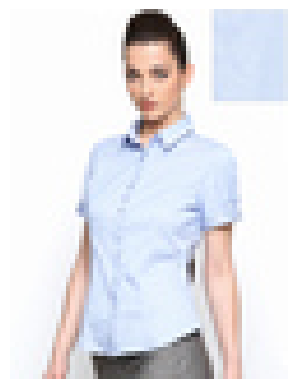

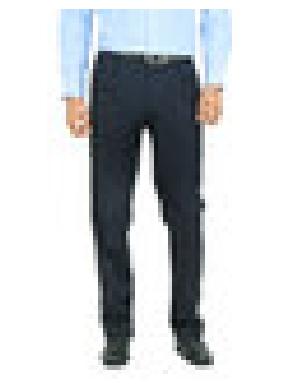

Best recommendation: 44672 23072
Rank your overall satisfaction with your recommendation our of 10: 4
Rank your satisfaction of your recommendation's gender match out of 5: 0
Rank your satisfaction of your recommendation's base colour out of 5: 5
Rank your satisfaction of your recommendation's season out of 5: 5
Rank your satisfaction of your recommendation's usage out of 5: 3


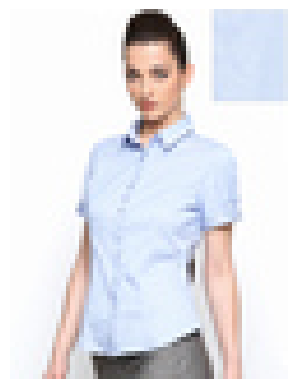

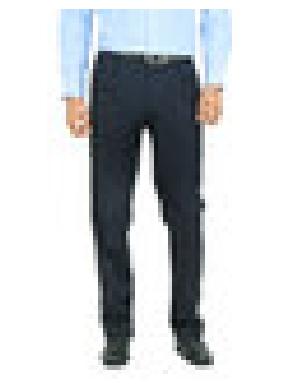

Best recommendation: 44672 23072


KeyboardInterrupt: Interrupted by user

In [ ]:

import csv
from PIL import Image
import matplotlib.pyplot as plt


# Define weights for each attribute (higher weight means higher importance)
attribute_weights = {
    'gender': 1,
    'baseColour': 3,
    'season': 2,
    'usage': 2
}

# Define the population size
POPULATION_SIZE = 50

#generate the initial population
population = []
def generate_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = {
            'gender': np.random.choice(user_preferences['gender']),
            'baseColour': np.random.choice(user_preferences['baseColour']),
            'season': np.random.choice(user_preferences['season']),
            'usage': np.random.choice(user_preferences['usage'])
        }
        population.append(individual)
    return population

def crossover(parent1, parent2):

  # implement crossover to generate offspring from parent individuals
  child = {}
  crossover = np.random.choice(user_preferences.keys())
  crossover_found = False
  for key in parent1:
    if not crossover_found and key != crossover:
      child[key] = parent1[key]
    else:
      child[key] = parent2[key]
      if key == crossover:
        crossover_found = True
  return child
  pass

def mutation(individual):

  # implement mutation to introduce diversity in the population
  mutated_individual = individual.copy()
  mutation = np.random.choice(user_preferences.keys())
  individual[mutation] = np.random.choice(attribute_choices.get(key))
  return mutated_individual
  pass


# the fitness function evaluates how close we are to the optimal solution
def evaluate_fitness(individual, user_preferences, attribute_weights):
    fitness = 0
    for key in user_preferences:
        if key == 'bottom size':
            if individual[key] in user_preferences[key]:
                fitness += attribute_weights.get(key, 0)
        else:
            if individual[key] in user_preferences[key]:
                fitness += attribute_weights.get(key, 0)
    return fitness

#evolutionary algorithm
def evolutionary_algorithm(user_preferences, attribute_weights):
    best_individual = None
    best_fitness = 0
    population = generate_population()
    for generation in range(50):

        fitness_scores = [evaluate_fitness(individual, user_preferences, attribute_weights) for individual in population]

        for idx, fitness_score in enumerate(fitness_scores):
            if fitness_score > best_fitness:
                best_individual = population[idx]
                best_fitness = fitness_score
        population = generate_population()

    return best_individual

def comparison(best_recommendation):
  # comparing the best individual to every entry in the csv to see what matches
  best_match_top = 0
  temp_count_top = 0
  best_id_top = None
  best_match_bot = 0
  temp_count_bot = 0
  best_id_bot = None
  df = pd.read_csv('styles.csv')
  with open('styles.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
      for key in best_recommendation:
        #print(key)
        if (row['subCategory'] == 'Topwear'):
          if best_recommendation[key].lower() == row[key].lower():
            temp_count_top += 1
        if (row['subCategory'] == 'Bottomwear'):
          if best_recommendation[key].lower() == row[key].lower():
            temp_count_bot += 1
      if temp_count_top > best_match_top:
        best_match_top = temp_count_top
        best_id_top = row['id']
      temp_count_top = 0

      if temp_count_bot > best_match_bot:
        best_match_bot = temp_count_bot
        best_id_bot = row['id']
      temp_count_bot = 0

  return best_id_top, best_id_bot



def retrieve_image(best_id):
  image_name = best_id + '.jpg'
  image_path = 'drive/MyDrive/fashion-dataset/images/' + image_name
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('off')
  plt.show()

best_recommendation = evolutionary_algorithm(user_preferences, attribute_weights)
#print(comparison(best_recommendation))
top, bottom = comparison(best_recommendation)
retrieve_image(top)
retrieve_image(bottom)
print("Best recommendation:", top, bottom)

satisfied = int(input("Rank your overall satisfaction with your recommendation our of 10: "))


while(satisfied <= 6):
  gender_satisfaction = int(input("Rank your satisfaction of your recommendation's gender match out of 5: "))
  colour_satisfaction = int(input("Rank your satisfaction of your recommendation's base colour out of 5: "))
  season_satisfaction = int(input("Rank your satisfaction of your recommendation's season out of 5: "))
  usage_satisfaction = int(input("Rank your satisfaction of your recommendation's usage out of 5: "))

  attribute_weights['gender'] += (5 - gender_satisfaction)
  attribute_weights['baseColour'] += (5 - colour_satisfaction)
  attribute_weights['season'] += (5 - season_satisfaction)
  attribute_weights['usage'] += (5 - usage_satisfaction)

  best_recommendation = evolutionary_algorithm(user_preferences, attribute_weights)
  top, bottom = comparison(best_recommendation)
  retrieve_image(top)
  retrieve_image(bottom)
  print("Best recommendation:", top, bottom)

  satisfied = int(input("Rank your overall satisfaction with your recommendation our of 10: "))

